## **Norm**

In [88]:
import numpy as np
x = np.array([2, 3])
norm_l1 = np.linalg.norm(x, ord=1)  # L1 norm
norm_l1

5.0

In [90]:
norm_l2 = np.linalg.norm(x, ord=2)  # L2 norm
norm_l2

3.605551275463989

In [89]:
scale_l1 = x/norm_l1
scale_l1

array([0.4, 0.6])

In [99]:
x/norm_l1           # scaled by 1-norm
np.square(x/norm_l1)
np.sum(x/norm_l1)

1.0

In [97]:
x/norm_l2           # scaled by 2-norm
np.square(x/norm_l2)
np.square(x/norm_l2).sum()

1.0

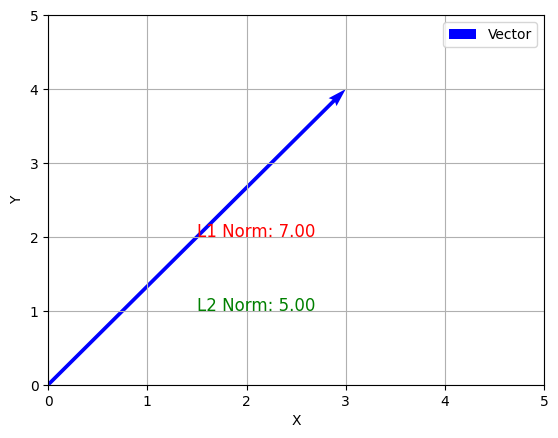

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a 2D vector
vector_2d = np.array([3, 4])

# Compute the norms
norm_l1 = np.linalg.norm(vector_2d, ord=1)  # L1 norm
norm_l2 = np.linalg.norm(vector_2d)         # L2 norm

# Create a figure and 2D axis
fig, ax = plt.subplots()

# Plot the vector
ax.quiver(0, 0, vector_2d[0], vector_2d[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector')

# Add a text annotation for the norms
ax.text(vector_2d[0] / 2, vector_2d[1] / 2, f'L1 Norm: {norm_l1:.2f}', color='r', fontsize=12)
ax.text(vector_2d[0] / 2, vector_2d[1] / 2 - 1, f'L2 Norm: {norm_l2:.2f}', color='g', fontsize=12)

# Set axis limits
ax.set_xlim([0, 5]); ax.set_ylim([0, 5])

# Set axis labels
ax.set_xlabel('X'); ax.set_ylabel('Y')

# Add a legend
ax.legend()
plt.grid(True)
plt.show()

In [70]:
# Generate a 2D vector
vector_2d/norm_l2

array([0.6, 0.8])

In [72]:
0.6**2 + 0.8**2

1.0

In [ ]:
# Generate a 2D vector
vector_2d = np.array([3, 4])

# Compute the norms
norm_l1 = np.linalg.norm(vector_2d, ord=1)  # L1 norm

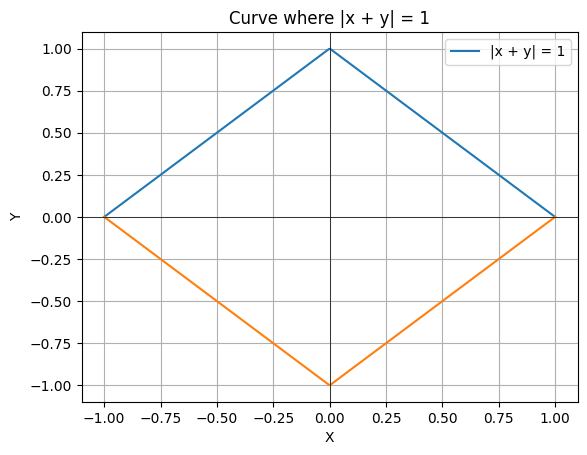

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# Generate values for x
x = np.linspace(-1, 1, 400)

# Calculate corresponding values for y
y_pos = 1 - np.abs(x); y_neg = -1 + np.abs(x)

# Plot the curve where |x + y| = 1
plt.plot(x, y_pos, label='|x + y| = 1')
plt.plot(x, y_neg)

# Set axis labels
plt.xlabel('X'); plt.ylabel('Y')

# Add a legend
plt.legend()

plt.title('Curve where |x + y| = 1')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

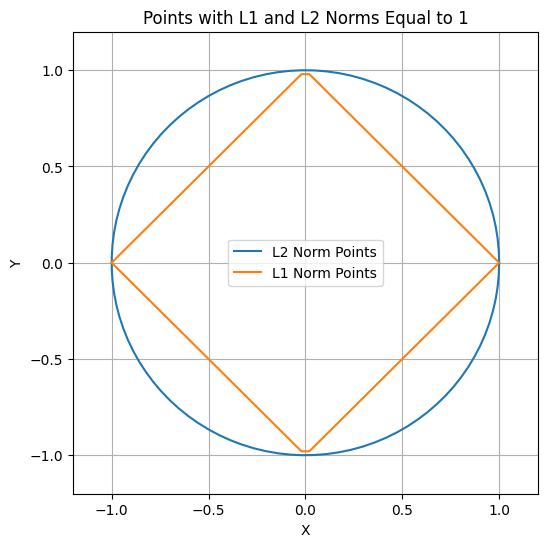

In [100]:
import numpy as np
import matplotlib.pyplot as plt

# Generate points on a unit circle for L2 norm
theta = np.linspace(0, 2*np.pi, 100)
x_l2 = np.cos(theta)
y_l2 = np.sin(theta)

# Generate points on a diamond shape for L1 norm
x_l1 = np.concatenate([np.linspace(-1, 1, 50), np.linspace(1, -1, 50)])
y_l1 = np.concatenate([1 - np.abs(x_l1[:50]), -1 + np.abs(x_l1[50:])])

# Plot the points
plt.figure(figsize=(6, 6))

# L2 norm points (circle)
plt.plot(x_l2, y_l2, label='L2 Norm Points')
# L1 norm points (diamond)
plt.plot(x_l1, y_l1, label='L1 Norm Points')

# Set axis labels
plt.xlabel('X'); plt.ylabel('Y')

# Set axis limits
plt.xlim([-1.2, 1.2]); plt.ylim([-1.2, 1.2])

# Add legend
plt.legend()

plt.title('Points with L1 and L2 Norms Equal to 1')
plt.grid(True)


## **Geometry:**
###**1. Transformation Matrices (2D Rotation):**

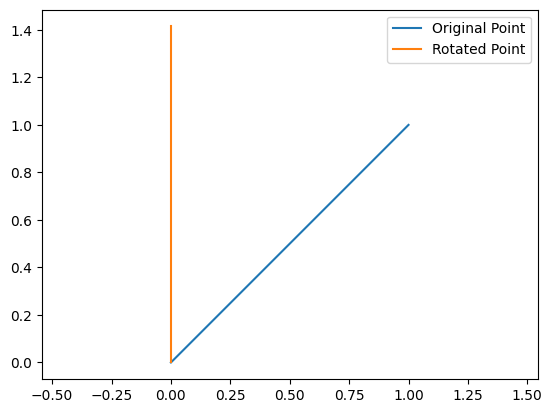

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define a 2D point
point = np.array([1, 1])

# Define a 2D rotation matrix
theta = np.pi / 4  # 45 degrees
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                            [np.sin(theta), np.cos(theta)]])

# Apply rotation to the point
rotated_point = np.dot(rotation_matrix, point)

# Plot the original and rotated points
plt.plot([0, point[0]], [0, point[1]], label='Original Point')
plt.plot([0, rotated_point[0]], [0, rotated_point[1]], label='Rotated Point')
plt.legend()
plt.axis('equal')
plt.show()

In [3]:
point

array([1, 1])

In [2]:
point/np.linalg.norm(point)

array([0.70710678, 0.70710678])

### **2. Eigenvalues and Eigenvectors (Principal Component Analysis - PCA):**

(-2.3421502910230276,
 2.5735911206244833,
 -2.5479235321417995,
 3.032531365871148)

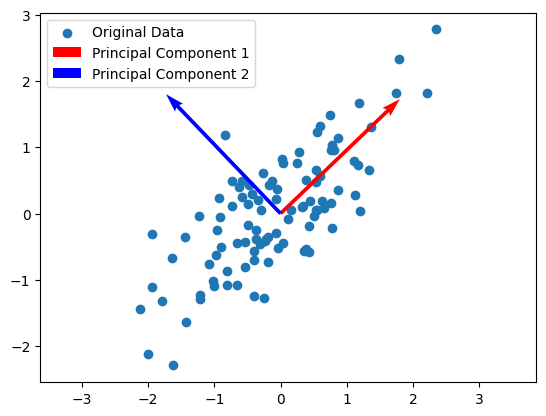

In [114]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Generate 2D data
data = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.8], [0.8, 1]], size=100)

# Apply PCA
pca = PCA()
pca.fit(data)

# Plot the original data and principal components
plt.scatter(data[:, 0], data[:, 1], label='Original Data')
plt.quiver(0, 0, pca.components_[0, 0], pca.components_[0, 1], scale=3, color='r', label='Principal Component 1')
plt.quiver(0, 0, pca.components_[1, 0], pca.components_[1, 1], scale=3, color='b', label='Principal Component 2')
plt.legend()
plt.axis('equal')

## **Optimization:**
### **1. Linear Programming:**

In [127]:
from scipy.optimize import linprog

# Objective function coefficients
c = [-3, -2]  # Minimize -3x1 - 2x2 is equivalent to maximizing 3x1 + 2x2
# Inequality constraints matrix
A = [[1, 1], [2, 1], [-1, 0]]  # Note the change in the third constraint
# Inequality constraints vector
b = [100, 100, -40]

# Bounds for variables
x0_bounds = (0, None)
x1_bounds = (0, None)

# Solve linear programming problem
result = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], method='highs')
# Display the results
# Negate the result because linprog minimizes by default
print('Optimal value (max z):', -result.fun)
print('Optimal point (x1, x2):', result.x)

Optimal value (max z): 160.0
Optimal point (x1, x2): [40. 20.]


### **2. Least Squares Regression:**

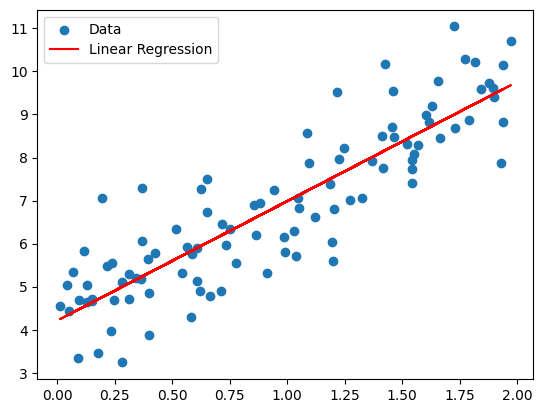

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Perform linear regression
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Plot the data and regression line
plt.scatter(X, y, label='Data')
plt.plot(X, X_b.dot(theta_best), color='red', label='Linear Regression')
plt.legend()
plt.show()

## **Machine Learning:**
### **1. Principal Component Analysis (PCA)**:

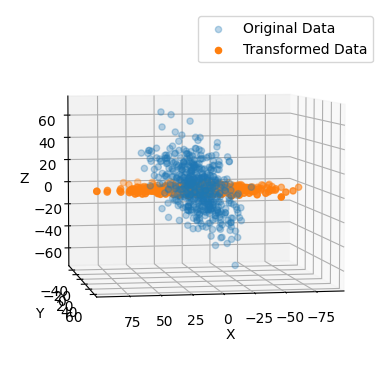

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import necessary module for 3D projection
from sklearn.decomposition import PCA

# Generate 3D data
data = np.random.multivariate_normal(mean=[0, 0, 0],
                                     cov=[[1, 0.8, 0.5], [0.8, 1, 0.3], [0.5, 0.3, 1]],
                                     size=500)*20
# Apply PCA
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(data)

# Plot the original and transformed data in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], label='Original Data', alpha = 0.3)
ax.scatter(transformed_data[:, 0], transformed_data[:, 1], np.zeros_like(transformed_data[:, 1]),
           label='Transformed Data',)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Adjust the viewing angle
ax.view_init(elev=5, azim=80)  # Set the elevation and azimuth angles
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generate 3D data
np.random.seed(42)
data = np.random.multivariate_normal(mean=[0, 0, 0], cov=[[1, 0.8, 0.5], [0.8, 1, 0.3], [0.5, 0.3, 1]], size=100)
data.shape

(100, 3)

In [ ]:

# Apply PCA
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(data)

# Plot the original and transformed data
plt.scatter(data[:, 0], data[:, 1], label='Original Data')
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], label='Transformed Data')
plt.legend()
plt.axis('equal')
plt.show()

### **2. Singular Value Decomposition (SVD):**

In [15]:
import numpy as np

# Generate a matrix
A = np.random.rand(3, 3)

# Perform SVD
U, S, Vt = np.linalg.svd(A, full_matrices=False)

# Reconstruct the original matrix
A_reconstructed = U @ np.diag(S) @ Vt

print("Original Matrix:")
print(A)
print("\nReconstructed Matrix:")
print(A_reconstructed)

Original Matrix:
[[0.40895294 0.17329432 0.15643704]
 [0.2502429  0.54922666 0.71459592]
 [0.66019738 0.2799339  0.95486528]]

Reconstructed Matrix:
[[0.40895294 0.17329432 0.15643704]
 [0.2502429  0.54922666 0.71459592]
 [0.66019738 0.2799339  0.95486528]]
